In [ ]:
#Netflix data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [3]:
# Load the dataset
data = pd.read_csv("netflix1.csv")

In [4]:
# Display the first few rows of the dataset
print(data.head())

  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dr

In [5]:
# Check for missing values
print(data.isnull().sum())

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [7]:
# Drop duplicates if any
data.drop_duplicates(inplace=True)

In [8]:
# Drop rows with missing critical information
data.dropna(subset=['director',  'country'],
inplace=True)

In [9]:
# Convert 'date_added' to datetime
data['date_added'] = pd.to_datetime(data['date_added'])

In [10]:
# Show data types to confirm changes
print(data.dtypes)

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object


In [16]:
# Count the number of Movies and TV Shows
type_counts = data['type'].value_counts()

In [17]:
type_counts


type
Movie      6126
TV Show    2664
Name: count, dtype: int64

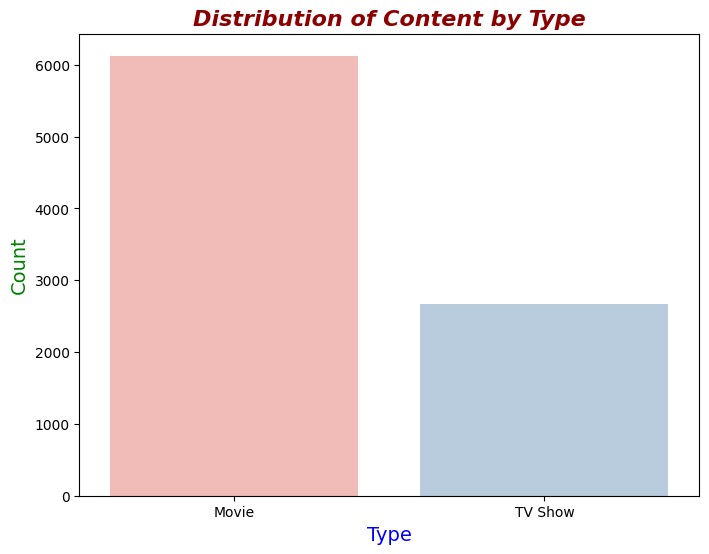

In [23]:
# Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=type_counts.index, y=type_counts.values,hue=type_counts.index,
palette='Pastel1',legend=False)
plt.title('Distribution of Content by Type',fontsize=16,color='darkred',fontweight='bold',fontstyle='italic')
plt.xlabel('Type',fontsize=14,color='blue')
plt.ylabel('Count', fontsize=14, color='green')
plt.show()

In [24]:
# Split the 'listed_in' column and count genres
data['genres'] = data['listed_in'].apply(lambda x: x.split(','))
all_genres = sum(data['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)

In [25]:
data['genres']


0                                         [Documentaries]
1       [Crime TV Shows,  International TV Shows,  TV ...
2                  [TV Dramas,  TV Horror,  TV Mysteries]
3                   [Children & Family Movies,  Comedies]
4       [Dramas,  Independent Movies,  International M...
                              ...                        
8785                 [International TV Shows,  TV Dramas]
8786                                           [Kids' TV]
8787    [International TV Shows,  Romantic TV Shows,  ...
8788                                           [Kids' TV]
8789                                           [Kids' TV]
Name: genres, Length: 8790, dtype: object

In [27]:
genre_counts

 International Movies     2624
Dramas                    1599
Comedies                  1210
Action & Adventure         859
Documentaries              829
 Dramas                    827
International TV Shows     773
 Independent Movies        736
 TV Dramas                 695
 Romantic Movies           613
Name: count, dtype: int64

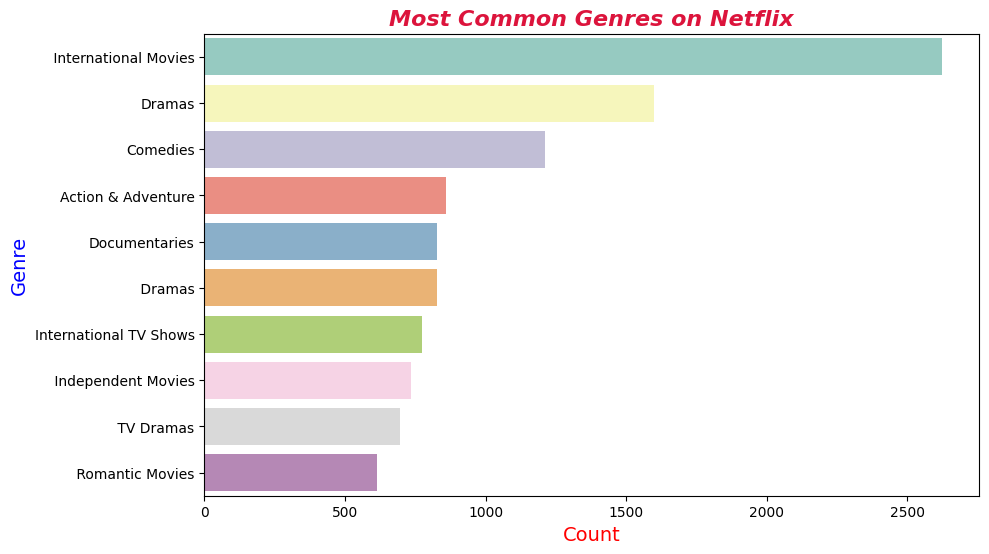

In [30]:
# Plot the most common genres
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index,hue=genre_counts.index,
palette='Set3',legend=False)
plt.title('Most Common Genres on Netflix',fontsize=16,fontweight='bold',color='crimson',fontstyle='italic')
plt.xlabel('Count',fontsize=14,color='red')
plt.ylabel('Genre',fontsize=14,color='blue')
plt.show()

In [31]:
# Extract year and month from 'date_added'
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month

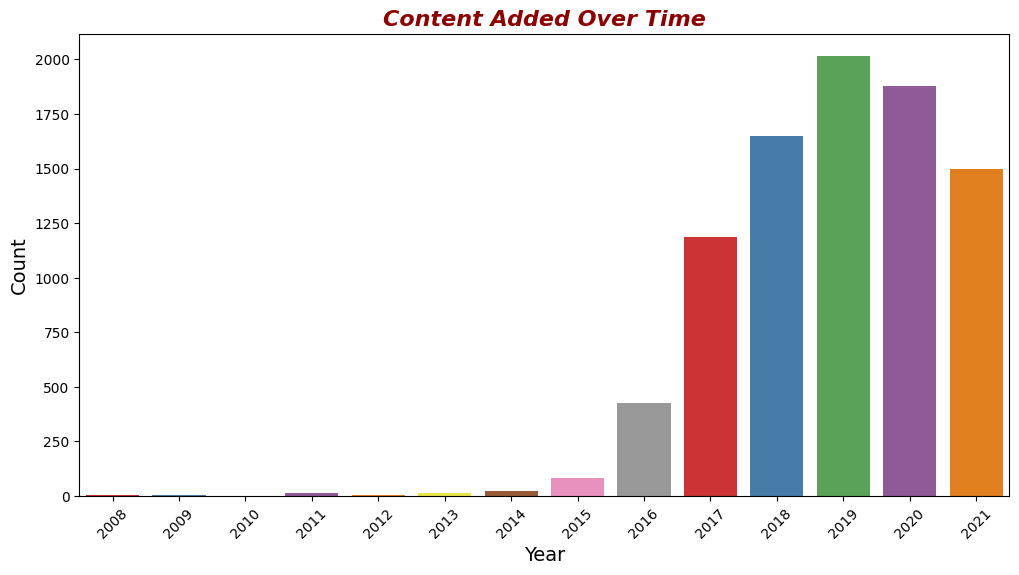

In [45]:
# Plot content added over the years
plt.figure(figsize=(12, 6))
sns.countplot(x='year_added', data=data,hue='year_added',  palette='Set1',legend=False)
plt.title('Content Added Over Time',fontsize=16,fontweight='bold',color='darkred',fontstyle='oblique')
plt.xlabel('Year',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(rotation=45)

plt.show()

In [46]:
# Count titles by director
top_directors = data['director'].value_counts().head(10)

In [47]:
top_directors

director
Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Name: count, dtype: int64

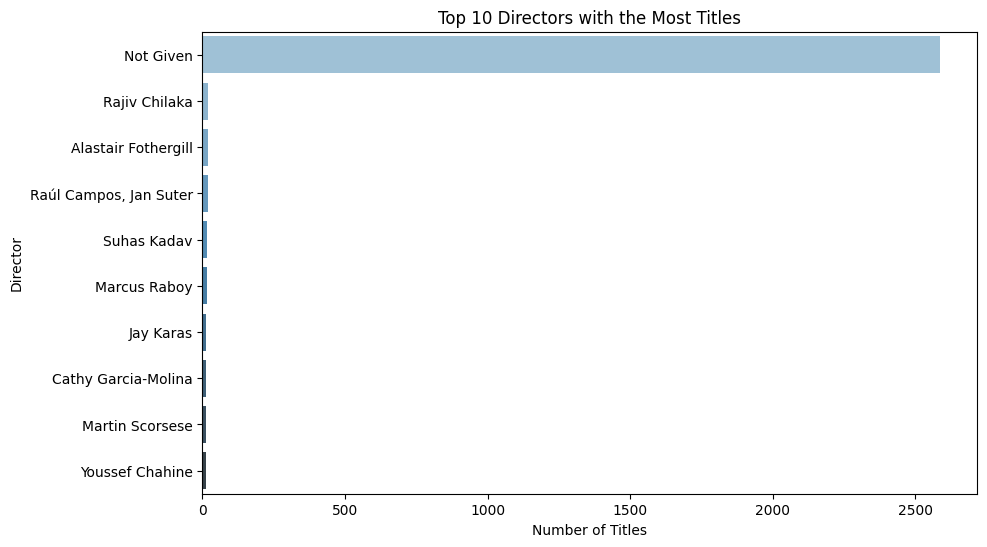

In [49]:
# Plot top directors
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index,hue=top_directors.index,
palette='Blues_d',legend=False)
plt.title('Top 10 Directors with the Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

In [50]:
# Generate word cloud
movie_titles = data[data['type'] == 'Movie']['title']
wordcloud = WordCloud(width=800, height=400,
background_color='black').generate(' '.join(movie_titles))

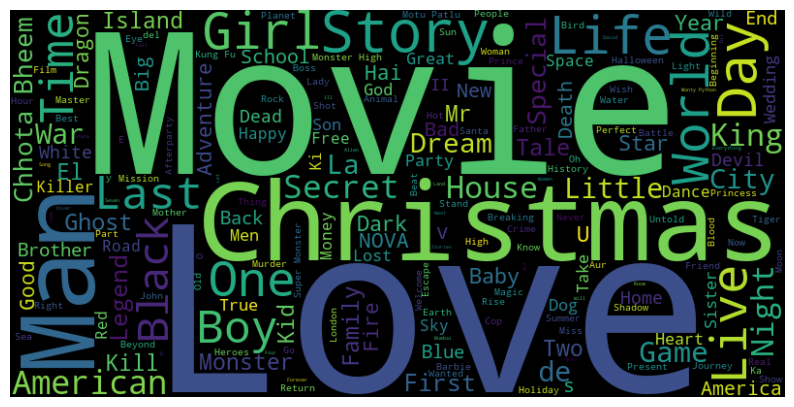

In [51]:
# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
         #Creating new feature, such as counting the number of  genres per movie
                           
                           

In [7]:
# Count number of genres per title
data['num_genres'] = data['listed_in'].apply(lambda x: len(x.split(',')))

In [ ]:
data['listed_in'] → column that has genres, e.g.
"Dramas, International Movies, Thrillers"

.apply(lambda x: ...) → applies a small function to every row in that column.

x.split(',') → splits the string into a list at commas:
"Dramas, International Movies, Thrillers" →
["Dramas", " International Movies", " Thrillers"]

len(...) → counts how many items in the list.
In this example → 3 genres.

The result is stored in a new column num_genres.

In [11]:
# See first few rows with original and new column
data[['title', 'listed_in', 'num_genres']].head(10)





,title,listed_in,num_genres
0,Dick Johnson Is Dead,Documentaries,1
1,Ganglands,"Crime TV Shows, International TV Shows, TV Act...",3
2,Midnight Mass,"TV Dramas, TV Horror, TV Mysteries",3
3,Confessions of an Invisible Girl,"Children & Family Movies, Comedies",2
4,Sankofa,"Dramas, Independent Movies, International Movies",3
5,The Great British Baking Show,"British TV Shows, Reality TV",2
6,The Starling,"Comedies, Dramas",2
7,Motu Patlu in the Game of Zones,"Children & Family Movies, Comedies, Music & Mu...",3
8,Je Suis Karl,"Dramas, International Movies",2
9,Motu Patlu in Wonderland,"Children & Family Movies, Music & Musicals",2


In [10]:
# Summary statistics
data['num_genres'].describe()

count    8790.000000
mean        2.194994
std         0.784114
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: num_genres, dtype: float64

In [13]:
# Frequency counts (how many movies have 1, 2, 3... genres)
data['num_genres'].value_counts().sort_index()

num_genres
1    2012
2    3052
3    3726
Name: count, dtype: int64

In [ ]:
#The model successfully classifies Netflix titles into Movies or TV Shows.
#It shows the power of Machine Learning in handling real-world data.
#This approach can be extended to recommendations and trend analysis.
#Overall, it improves user experience and content management on Netflix.